In [6]:
import os
os.getcwd()
os.chdir('/Users/hughainsleyperez/anaconda_projects/cd3e958c-8b0c-44c7-8e8f-c609f1b57112')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

invoices = pd.read_csv('fct_invoice.csv')
customers = pd.read_json('dim_customer.json')

invoices.head()
customers.head()


,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


In [13]:
invoices.columns

Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [14]:
customers.columns

Index(['age', 'first_name', 'gender', 'id', 'last_name'], dtype='object')

In [17]:
#Easy Number 1

customers['id'].nunique()

5191

In [24]:
#Easy Number 2

categories = invoices['category'].unique().tolist()
number = invoices['category'].nunique()

categories, number

(['Clothing',
  'Shoes',
  'Books',
  'Cosmetics',
  'Food & Beverage',
  'Toys',
  'Technology',
  'Souvenir'],
 8)

In [25]:
#Easy Number 3

most_used_method = invoices['payment_method'].value_counts().idxmax()
most_used_count = invoices['payment_method'].value_counts().max()

most_used_method, most_used_count


('Cash', 44447)

In [26]:
#Medium Number 1

invoices['sales'] = invoices['price'] * invoices['quantity']
category_sales = invoices.groupby('category')['sales'].sum()
top_categories = category_sales.sort_values(ascending=False).head(3)

top_categories


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64

In [27]:
#Medium Number 2

merged = invoices.merge(customers, left_on = 'customer_id', right_on = 'id')
over_45 = merged[merged['age'] > 45]
total_sales_over_45 = over_45['sales'].sum()

total_sales_over_45


82039768.15

/var/folders/_v/y7vrgnpj1cbf11whcycs4mj00000gn/T/ipykernel_2659/1023772761.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = invoices['sales'].resample('M').sum()


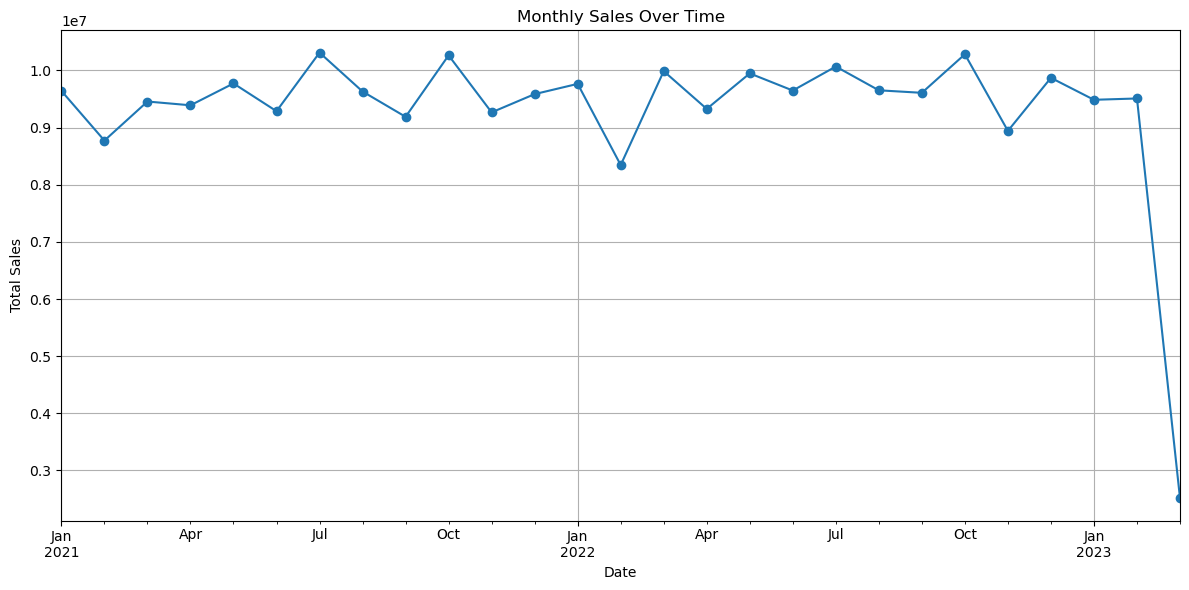

In [30]:
#Medium Number 3

invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], dayfirst=True)
invoices.set_index('invoice_date', inplace=True)
monthly_sales = invoices['sales'].resample('M').sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Sales are generally stable and don't really dip. However, it does heavily go down after January 2023, which suggests the data ends there.

In [31]:
# Hard

merged = invoices.merge(customers, left_on='customer_id', right_on='id')
merged['age_group'] = (merged['age'] // 10 * 10).astype('Int64').astype(str) + '-' + ((merged['age'] // 10 * 10 + 9).astype('Int64')).astype(str)
pivot = pd.pivot_table(
    merged,
    values='sales',
    index='category',
    columns='age_group',
    aggfunc='sum',
    fill_value=0
)

pivot


age_group,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,<NA>-<NA>
category,,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,334012.05
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,46003764.40
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,2777362.62
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,345875.59
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,26468097.17
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,265661.04
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,23865450.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,1587210.24
